In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as wdgt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('Unemployment_Rates.csv')
df.columns = df.columns.str.strip()  # This was obtained by ChatGPT and will remove any leading or trailing spaces from all column names, this was an issue wth the unemployment rate


This is a basic import file to get the necessary libraries and allows pandas to read the file

I had issues getting the file to read but i tried restarting my kernel on VScode and it began to work

In [37]:
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
selected_area = None

def on_value_change(change):
    global selected_area
    selected_area = change['new']

dropdown.observe(on_value_change, names='value')
# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

Dropdown(options=('New York State', 'Albany County', 'Allegany County', 'Bronx County', 'Broome County', 'Catt…

This gets all the unique areas in the state of New York, I orignally had every value which was over 91,000 so I checked the pandas documentation here (https://pandas.pydata.org/docs/reference/api/pandas.Index.unique.html#pandas.Index.unique) and I found the unique keyword which just displays each of then once into the dropdown menu

In [38]:
selected_data = df[df['Area'] == selected_area]

unemployment_rates = selected_data['Unemployment Rate']
year = selected_data['Year']
month = selected_data['Month']

# This is retrieving the unemployment rate, month and year


In [39]:
covid_filtered_df = df[(df['Area'] == 'Bronx County') & (df['Year'] == 2020)]
post_covid_filtered_df = df[(df['Area'] == 'Bronx County') & (df['Year'] == 2021)]

In the code block above I am going to use Bronx County as an example but most of the data follows a similar trend, I am filtering the data so that I can just retrieve the data for 2020 when covid hit and 2021 when it was starting to calm down, I am doing this because covid was a big outlier in my data so I wanted to compare it to even the year after so we can see how quickly the job market recovered after the affects that covid had on it

<Axes: title={'center': 'Bronx County, 2020'}, xlabel='Month', ylabel='Unemployment Rate'>

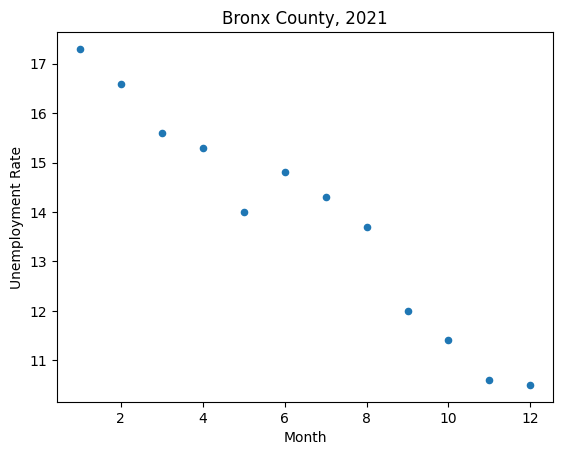

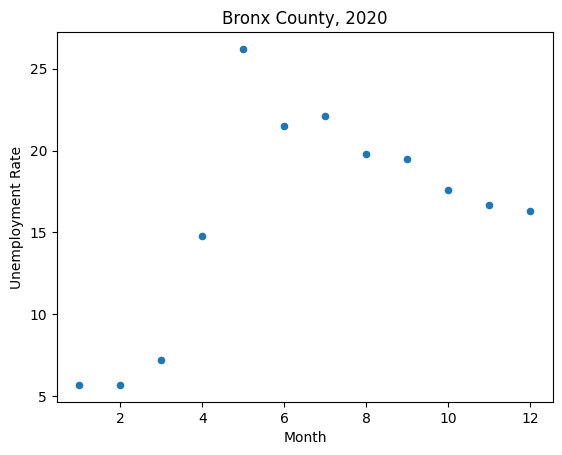

In [40]:
post_covid_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = 'Bronx County' + ', 2021')
covid_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = 'Bronx County' + ', 2020')

A big factor that has an affect on my data was covid as you can see it nearly doubles for most areas when the lockdown hit, but then steadily declines for the months after, this is because of the initial mass panic that insued when covid was happening

0.30549761099556527
0.9513282132200932


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


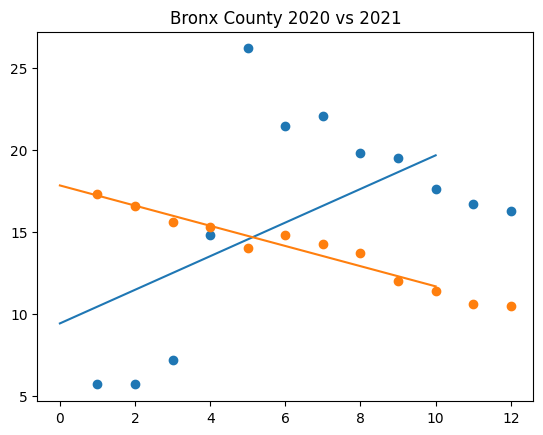

In [41]:
model = LinearRegression(fit_intercept=True)

x = covid_filtered_df[['Month']]
y = covid_filtered_df['Unemployment Rate'] 

model.fit(x,y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title('Bronx County, 2020')
plt.scatter(x, y,)
plt.plot(xfit, yfit)
# This is fitting the line to the data

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)

model = LinearRegression(fit_intercept=True)

x = post_covid_filtered_df[['Month']]
y = post_covid_filtered_df['Unemployment Rate'] 

model.fit(x,y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title('Bronx County 2020 vs 2021')
plt.scatter(x, y,)
plt.plot(xfit, yfit)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print(r2)

As you can see from the chart below, covid massively affected the unemployments when it hit in april 2020, with unemployment skyrocketing by over 10%.

It did gradually being to drop as time went on and the initial panic form the pandemic calmed down with 2021 being a good indicator of this as it drops fairly consistently throughout the year.

This is backed up by the accuracy of the charts as 2020 is at a very low percentage as it took a huge spike in april and then had to slowly recover but 2021 was always on the gradual decline and is sitting at a much higher percentage.

In [42]:
# From my findings the month is going to be too specific as there are too many points to plot so I am going to combine them into an average for the year 
df = pd.read_csv('Unemployment_rates.csv')

df.columns = df.columns.str.strip()
average_unemployment = df.groupby(['Area', 'Year'])['Unemployment Rate'].mean().reset_index() # This was obtained from ChatGPT to get the average for each year and store it


average_unemployment['Unemployment Rate'] = average_unemployment['Unemployment Rate'].round(1) # This is rounding the average to one decimal place


average_unemployment.to_csv('cleaned-unemployment-rates.csv', index=False) # This is putting the cleansed data into a new csv


In [43]:
df = pd.read_csv('cleaned-unemployment-rates.csv')
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
new_selected_area = None

def on_value_change(change):
    global new_selected_area
    new_selected_area = change['new']

dropdown.observe(on_value_change, names='value')

# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

Dropdown(options=('Albany City', 'Albany County', 'Albany-Rensselaer-Schenectady Counties', 'Albany-Schenectad…

<Axes: title={'center': 'New York State'}, xlabel='Year', ylabel='Unemployment Rate'>

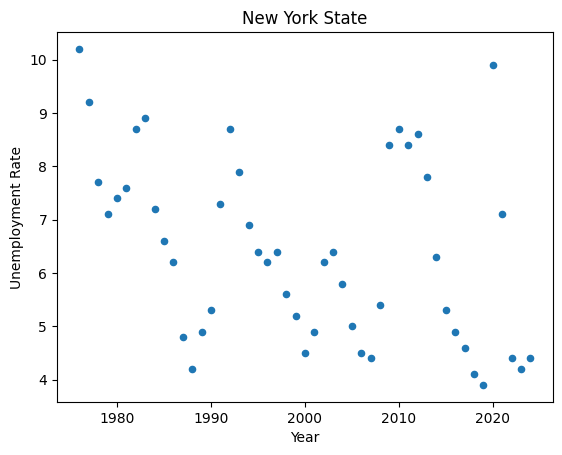

In [44]:
filtered_df = df[df['Area'] == 'New York State']
filtered_df.plot.scatter(x = 'Year', y = 'Unemployment Rate', title = 'New York State')

As you can see in the vast majority of the graphs the data is very chaotic and spreads a lot, therefore it doesn't fit the linear regression model

You can take some very interseting points from these graphs however as the big spikes can usually be attributed to a major world event

For example, in 2020 it spiked massively due to covid

In 2008 it spiked massively due to the global financial crisis which led to mass unemployment

In 1990 America was going through a massive economic recession and the gulf war which led to massive levels unemployment

And once again in the mid 70s to early 80s America was going through another big recession and this led to a lot of unemployment around the nation

# Summary of Findings

# Data Sources 
My data for this was obtained from the US government dataset website from this link: https://catalog.data.gov/dataset/local-area-unemployment-statistics-beginning-1976 , I used this as I wanted to get a model that wasn't too pre-processed and it would give me good experience with dealing with the challenges that come with using a real dataset where not every value will be perfectly formatted

# Pre Processing
There was a lot of pre-processing for this data, there's over 91,000 rows of data for this dataset as it gives you every months unemployment rate from 1976-2024 for every town/area in the state of New York, I tried displaying monthly data but it was too much so I had to then condense it to the year and I did this by getting the mean for the years using pandas library, this could be selected for any of the areas using a dropdown widget from ipywidgets but for this example I just chose one to represent the data easier

# Data Understanding
I now have a very good understanding of this dataset, I ran into a lot of issues with it as in the end the data didn't actually fit the linear regression model but I learnt a lot about the data when I was trying to figure this out for sure, my main focus with this dataset was around the time covid hit as this affected the data massively with most areas jumping by over 10% in unemployment rates but slowly starting to fall back to more normal rates, unfortunately the isue with this data was that it was too chaotic and throughout the years there are too many spikes and falls for me to make any sort of accurate prediction on the data but I have documented my many learnings from the data as there are a few major events that caused the spikes and they're as follows:
1. In 2020 it spiked massively due to covid
2. In 2008 it spiked massively due to the global financial crisis which led to mass unemployment
3. In 1990 America was going through a massive economic recession and the gulf war which led to massive levels unemployment
4. In the mid 70s to early 80s America was going through another big recession and this led to a lot of unemployment around the nation

These factors can be attributed to the 4 major spikes that can be seen throughout the data.

# Tools and tech used 
I used a few different libraries to help with displaying and understanding this dataset.
The first one I used was pandas which was absolutely crucial in helping me cleanse and process the data as I ended up making a couple of different sub CSV files from the original with more specific data.
I used matplotlib to make the charts which was helpful to display my findings and make predictions for future ones
I used scikitlearns library to implement my linear regression model on the data and get the best fit
I used numpy to calculate the data so that I could plot it all on the graph correctly
